## Programming with Python for Data Science

The data from various tye of files can be read using below mentioned methods
    
    from sqlalchemy import create_engine
    engine = create_engine('sqlite:///:memory:')
    sql_dataframe  = pd.read_sql_table('my_table', engine, columns=['ColA', 'ColB'])
    
    xls_dataframe  = pd.read_excel('my_dataset.xlsx', 'Sheet1', na_values=['NA', '?'])
    
    json_dataframe = pd.read_json('my_dataset.json', orient='columns')
    
    csv_dataframe  = pd.read_csv('my_dataset.csv', sep=',')
    
    table_dataframe= pd.read_html('http://page.com/with/table.html')[0]
    
    Note the return type of .read_html(), it is a Python list of dataframes, one per HTML table found on the webpage.

sep : str, default ‘,’

    Delimiter to use. If sep is None, will try to automatically determine this. Separators longer than 1 character and different from '\s+' will be interpreted as regular expressions, will force use of the python parsing engine and will ignore quotes in the data. Regex example: '\r\t'

delimiter : str, default None

    Alternative argument name for sep.

header : int or list of ints, default ‘infer’

    Row number(s) to use as the column names, and the start of the data. Default behavior is as if set to 0 if no names passed, otherwise None. Explicitly pass header=0 to be able to replace existing names. The header can be a list of integers that specify row locations for a multi-index on the columns e.g. [0,1,3]. Intervening rows that are not specified will be skipped (e.g. 2 in this example is skipped). Note that this parameter ignores commented lines and empty lines if skip_blank_lines=True, so header=0 denotes the first line of data rather than the first line of the file.

names : array-like, default None

    List of column names to use. If file contains no header row, then you should explicitly pass header=None. Duplicates in this list are not allowed unless mangle_dupe_cols=True, which is the default.

index_col : int or sequence or False, default None

    Column to use as the row labels of the DataFrame. If a sequence is given, a MultiIndex is used. If you have a malformed file with delimiters at the end of each line, you might consider index_col=False to force pandas to _not_ use the first column as the index (row names)

skipinitialspace : boolean, default False
    
    Skip spaces after delimiter.

skiprows : list-like or integer, default None
    
    Line numbers to skip (0-indexed) or number of lines to skip (int) at the start of the file

na_values : scalar, str, list-like, or dict, default None
    
    Additional strings to recognize as NA/NaN. If dict passed, specific per-column NA values. By default the following values are interpreted as NaN: ‘’, ‘#N/A’, ‘#N/A N/A’, ‘#NA’, ‘-1.#IND’, ‘-1.#QNAN’, ‘-NaN’, ‘-nan’,

thousands : str, default None
    
    Thousands separator

decimal : str, default ‘.’
    
    Character to recognize as decimal point (e.g. use ‘,’ for European data).

To convert any dataframe to any other type of file

    my_dataframe.to_sql('table', engine)
    my_dataframe.to_excel('dataset.xlsx')
    my_dataframe.to_json('dataset.json')
    my_dataframe.to_csv('dataset.csv')

The .loc[] method selects by column label, 

.iloc[] selects by column index, and 

.ix[] can be used whenever you want to use a hybrid approach of either.

#### Produces a series object:
    df.recency
    df['recency']
    df.loc[:, 'recency']
    df.iloc[:, 0]
    df.ix[:, 0]

#### Produces a dataframe object:
    df[['recency']]
    df.loc[:, ['recency']]
    df.iloc[:, [0]]

The difference between the two is, if a pair of big brackets is used inside the .loc operator the return type is a Data frame and if not a Series


In pandas the logical operators 'or' and 'and' are not available as they create ambiguity instead logical bitwise operators can be used i.e. | and &

#### Textual Categorical-Features

In [2]:
import pandas as pd
ordered_satisfaction = ['Very Unhappy', 'Unhappy', 'Neutral', 'Happy', 'Very Happy']
df = pd.DataFrame({'satisfaction':['Mad', 'Happy', 'Unhappy', 'Neutral']})
df.satisfaction = df.satisfaction.astype("category",
                  ordered=True,
                  categories=ordered_satisfaction
).cat.codes
df

,satisfaction
0,-1
1,3
2,1
3,2


If the column data in the data frame is ordinal and it is intended to classfy them in a order then change the data type to category.

The optional arguments are ordered and categories
    
    If order is true then it will arrange the return type in incerasing order.
    categories will take a sequence of odering

In [3]:
import pandas as pd

df = pd.DataFrame({'vertebrates':['Bird',
'Bird',
'Mammal',
'Fish',
'Amphibian',
'Reptile',
'Mammal']})

df.vertebrates = df.vertebrates.astype("category").cat.codes
df

,vertebrates
0,1
1,1
2,3
3,2
4,0
5,4
6,3


In [4]:
import pandas as pd

df = pd.DataFrame({'vertebrates':['Bird',
'Bird',
'Mammal',
'Fish',
'Amphibian',
'Reptile',
'Mammal']})

df['new_vertebrates'] = df.vertebrates.astype("category").cat.codes
df

,vertebrates,new_vertebrates
0,Bird,1
1,Bird,1
2,Mammal,3
3,Fish,2
4,Amphibian,0
5,Reptile,4
6,Mammal,3


In [5]:
df = pd.DataFrame({'vertebrates':['Bird',
'Bird',
'Mammal',
'Fish',
'Amphibian',
'Reptile',
'Mammal']})
df = pd.get_dummies(df,columns=['vertebrates'])
df

,vertebrates_Amphibian,vertebrates_Bird,vertebrates_Fish,vertebrates_Mammal,vertebrates_Reptile
0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,1.0
6,0.0,0.0,0.0,1.0,0.0


These newly created features are called boolean features because the only values they can contain are either 0 for non-inclusion, or 1 for inclusion. Pandas .get_dummies() method allows you to completely replace a single, nominal feature with multiple boolean indicator features. 

In [6]:
import sys
sys.version

'2.7.12 |Anaconda 4.2.0 (32-bit)| (default, Jun 29 2016, 11:42:13) [MSC v.1500 32 bit (Intel)]'

#### Pure Textual Features

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
"Authman ran faster than Harry because he is an athlete.",
"Authman and Harry ran faster and faster."]

bow = CountVectorizer()
X = bow.fit_transform(corpus) # Sparse Matrix

words = bow.get_feature_names()
#['an', 'and', 'athlete', 'authman', 'because', 'faster', 'harry', 'he', 'is', 'ran', 'than']

print (X.toarray())
print(words)

[[1 0 1 1 1 1 1 1 1 1 1]
 [0 2 0 1 0 2 1 0 0 1 0]]
[u'an', u'and', u'athlete', u'authman', u'because', u'faster', u'harry', u'he', u'is', u'ran', u'than']


In the above example 

    corpus is the given sentence
    bow is the bag of words
    features are the names of the columns
    x is the sparse matrix that is created to save memory, i.e. if actual words are used to create the feature then the dataframe will be huge

#### Graphical Features

from scipy import misc #Load the image up

img = misc.imread('image.png')

img = img[::2, ::2] #Is the image too big? Resample it down by an order of magnitude

X = (img / 255.0).reshape(-1) #Scale colors from (0-255) to (0-1), then reshape to 1D array per pixel, e.g. grayscale if you had
color images and wanted to preserve all color channels, use .reshape(-1,3)

#### Wrangling Your Data

Python's None and np.nan are different and to test whether a variable is np.nan or not isnull() and .notnull() are used.These two methods work on both series and dataframe

#### .fillna() method 

DataFrame.fillna(value=None, method=None, axis=None, inplace=False, limit=None, downcast=None, **kwargs)

    Value to use to fill holes
    methods are bfill, ffill, pad etc
    axis is 0 for index and 1 for columns
    limit:  this is the maximum number of consecutive NaN values to forward/backward fill.
    
DataFrame.interpolate(method='linear', axis=0, limit=None, inplace=False, limit_direction='forward', downcast=None, **kwargs)
    
    method are 'linear',‘time’, ‘index’, ‘values’, ‘nearest’, ‘zero’,‘slinear’, ‘quadratic’, ‘cubic’, ‘barycentric’, ‘krogh’, ‘polynomial’, ‘spline’, ‘piecewise_polynomial’, ‘from_derivatives’, ‘pchip’, ‘akima’
    
DataFrame.drop_duplicates(*args, **kwargs)
    
    subset : column label or sequence of labels, optional
             Only consider certain columns for identifying duplicates, by default use all of the columns
    
    keep : {‘first’, ‘last’, False}, default ‘first’
        first : Drop duplicates except for the first occurrence.
        last : Drop duplicates except for the last occurrence.
        False : Drop all duplicates.

Type Markdown and LaTeX:  α2α2 

First try to fill in missing data rather that deleting it. but if unable to fill it the use the .dropna() method.

    df = df.dropna(axis=0)  # remove any row with nans
    df = df.dropna(axis=1)  # remove any column with nans
    df = df.dropna(axis=0, thresh=4) # Drop any row that has at least 4 NON-NaNs within it:
To get rid of columns or features use,
    
    df = df.drop(labels=['Features', 'To', 'Delete'], axis=1) # Axis=1 for columns
    
To get rid of a row or index
    
    df = df.drop(labels=['ego', 'jealous', 'fear', axis = 0]) # Axis = 0 for rows
    
To drop duplicate records by comparing o features

    df = df.drop_duplicates(subset=['Feature_1', 'Feature_2'])
    
Chaining of operators is possible 
    
    df = df.dropna(axis=0, thresh=2).drop(labels=['ColA', axis=1]).drop_duplicates(subset=['ColB', 'ColC']).reset_index()

    



Pandas will automatically attempt to figure out the best data type to use for each series in your dataset. Most of the time it does this flawlessly, but other times it fails horribly! Particularly the .read_html() method is notorious for defaulting all series data types to Python objects.

    df.dtypes

        Date        object
        Name        object
        Gender      object
        Height      object
        Weight      object
        Age         object
        Job         object
        
    df.Date = pd.to_datetime(df.Date, errors='coerce')
    df.Height = pd.to_numeric(df.Height, errors='coerce')
    df.Weight = pd.to_numeric(df.Weight, errors='coerce')
    df.Age = pd.to_numeric(df.Age, errors='coerce')
    df.dtypes

        Date        datetime64
        Name        object
        Gender      object
        Height      float64
        Weight      float64
        Age         int64
        Job         object
        
The errors='coerce' parameter instructs Pandas to enter a NaN at any field where the conversion fails.

.unique() ethod gives all the unique values in a series
    
    df.Age.unique()

        array([7, 33, 27, 40, 22], dtype=int64)
    
    
.value_counts() method gives the count of all the unique values that are in a given column

    df.Age.value_counts()

        7      1
        22     5
        27     1
        33     2
        40     2
        dtype: int64

In [8]:
import pandas as pd

df = pd.read_csv('tutorial.csv')
df

,col0,col1,col2,col3
0,-0.722876,-1.330682,1.309208,0.232378
1,1.160396,-0.730879,0.677368,1.044722
2,-1.062870,-0.503704,-0.238536,-1.417937
3,0.437078,0.362640,-0.111228,-1.649853


In [9]:
df.loc[2:4, 'col3']

2   -1.417937
3   -1.649853
Name: col3, dtype: float64

In [10]:
df.describe()

,col0,col1,col2,col3
count,4.000000,4.000000,4.000000,4.000000
mean,-0.047068,-0.550656,0.409203,-0.447672
std,1.029715,0.701720,0.723956,1.300815
min,-1.062870,-1.330682,-0.238536,-1.649853
25%,-0.807875,-0.880830,-0.143055,-1.475916
50%,-0.142899,-0.617291,0.283070,-0.592780
75%,0.617907,-0.287118,0.835328,0.435464
max,1.160396,0.362640,1.309208,1.044722


In [11]:
import pandas as pd

df = pd.read_csv('servo.data', names = ['motor', 'screw', 'pgain', 'vgain', 'class'])
df

,motor,screw,pgain,vgain,class
0,E,E,5,4,0.281251
1,B,D,6,5,0.506252
2,D,D,4,3,0.356251
3,B,A,3,2,5.500033
4,D,B,6,5,0.356251
5,E,C,4,3,0.806255
6,C,A,3,2,5.100014
7,A,A,3,2,5.700042
8,C,A,6,5,0.768754
9,D,A,4,1,1.031254


In [12]:
(df.vgain == 5).value_counts()

False    145
True      22
Name: vgain, dtype: int64

In [13]:
((df.motor == 'E') & (df.screw == 'E')).value_counts()

False    161
True       6
dtype: int64

In [14]:
df[df.pgain == 4].vgain.mean()

2.0606060606060606

import pandas as pd
import html5lib

df = pd.read_html('http://www.espn.com/nhl/statistics/player/_/stat/points/sort/points/year/2015/seasontype/2')[0]
df.drop_duplicates(subset=[1],inplace = True)
df.drop(labels = [0], axis = 0, inplace = True)
df.columns = df.iloc[0]
df = df.reindex(df.index.drop(1))
df.dropna(axis=0, thresh=4, inplace = True)
df.drop(labels = 'RK', axis = 1, inplace = True)
df.reset_index(inplace = True)
df.drop(labels = 'index',axis = 1, inplace = True)
df

df.shape

len(df.PCT.unique())

In [19]:
import pandas as pd

df = pd.read_csv('census.data', names = ['education', 'age', 'capital-gain', 'race', 'capital-loss', 'hours-per-week', 'sex', 'classification'])
df

,education,age,capital-gain,race,capital-loss,hours-per-week,sex,classification
0,Bachelors,39,2174,White,0,40,Male,<=50K
1,Bachelors,50,?,White,0,13,Male,<=50K
2,HS-grad,38,?,White,0,40,Male,<=50K
3,11th,53,?,Black,0,40,Male,<=50K
4,Bachelors,28,0,Black,0,40,Female,<=50K
5,Masters,37,0,White,0,40,Female,<=50K
6,9th,49,0,Black,0,16,Female,<=50K
7,HS-grad,52,0,White,0,45,Male,>50K
8,Masters,31,14084,White,0,50,Female,>50K
9,Bachelors,42,5178,White,0,40,Male,>50K


#### Plotting data using Matplotlib

In [63]:
import pandas as pd

df = pd.read_csv(r'C:\Users\kkv1\Desktop\Python\DS\Microsoft ML\DAT210x-master\Module3\Datasets\wheat.data')
df

,id,area,perimeter,compactness,length,width,asymmetry,groove,wheat_type
0,0,15.26,14.84,0.8710,5.763,3.312,2.2210,5.220,kama
1,1,14.88,14.57,0.8811,5.554,3.333,1.0180,4.956,kama
2,2,14.29,14.09,0.9050,5.291,3.337,2.6990,4.825,kama
3,3,13.84,13.94,0.8955,5.324,3.379,2.2590,4.805,kama
4,4,16.14,14.99,0.9034,5.658,3.562,1.3550,5.175,kama
5,5,14.38,14.21,0.8951,5.386,3.312,2.4620,4.956,kama
6,6,14.69,14.49,0.8799,5.563,3.259,3.5860,5.219,kama
7,7,14.11,14.10,0.8911,5.420,3.302,2.7000,NaN,canadian
8,8,16.63,15.46,0.8747,6.053,3.465,2.0400,5.877,kama
9,9,16.44,15.25,0.8880,5.884,3.505,1.9690,5.533,kama


<IPython.core.display.Javascript object>


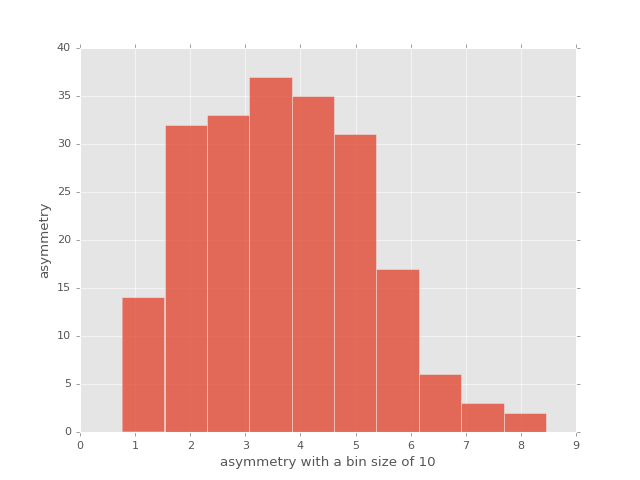

In [64]:
%matplotlib notebook
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot') 
df['asymmetry'].plot.hist(alpha=0.8)
ax = plt.gca()
ax.set_ylabel('asymmetry')
ax.set_xlabel('asymmetry with a bin size of 10')

The histogram plot as an optional parameter call 'bins' if not given it automatically divides the given series or Dataframe into parts 

It also has a optional paratmeter called width which is the width of the bar

To differnt plots in the jupytenotebook make use of plt.figure otherwise it will keep on updating the same figure

<IPython.core.display.Javascript object>


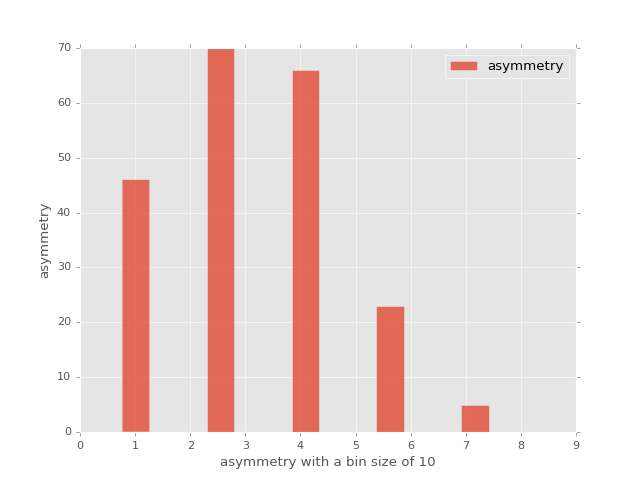

In [65]:
plt.figure()
df['asymmetry'].plot.hist(alpha=0.8, bins = 5, width = 0.5)
ax = plt.gca()
ax.set_ylabel('asymmetry')
ax.set_xlabel('asymmetry with a bin size of 10')
ax.legend()

In [66]:
df.width.dtype

dtype('float64')

<IPython.core.display.Javascript object>


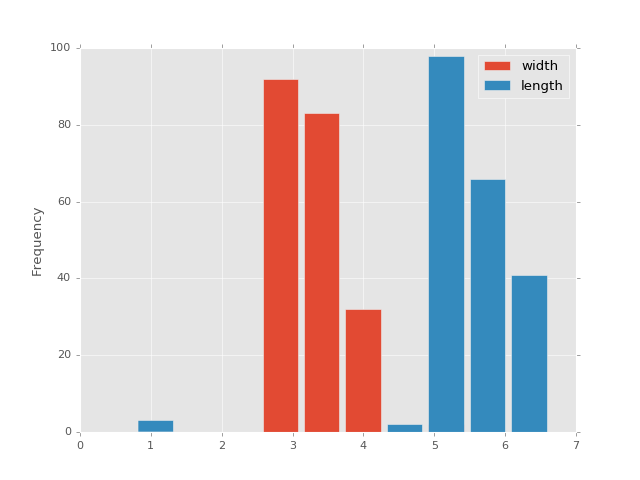

In [67]:
df[['width', 'length']].plot.hist(width = 0.5)

Histogram can also be plotted on a Dataframe
Before plotting the histogram on the above Dataframe id columns need to be dropped coz the value in ID  coulumn is too high

<IPython.core.display.Javascript object>


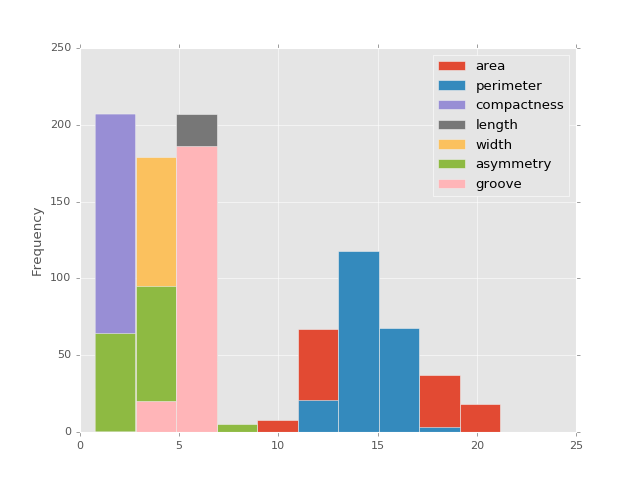

In [68]:
df.drop(labels = 'id', inplace = True, axis = 1)
df.plot.hist()

#### 2D Scatter plot

<IPython.core.display.Javascript object>


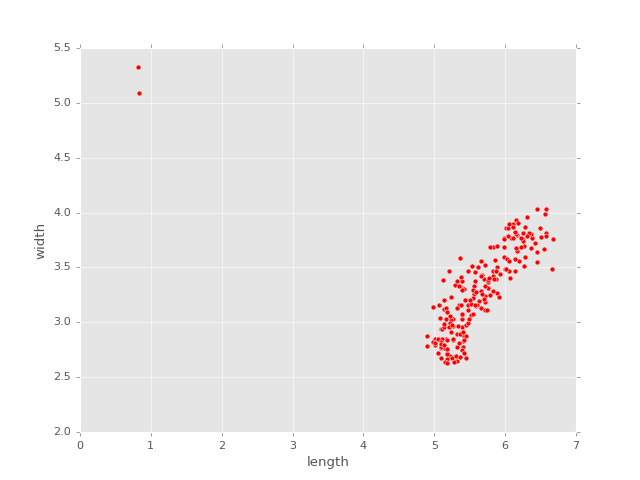

In [70]:
df.plot.scatter(x = 'length', y = 'width', c=  'red')